# Comparaison des modèles RNN, LSTM et GRU pour la prédiction des températures

La prédiction des températures consiste à anticiper les variations climatiques futures en analysant des données historiques de température. Dans ce projet, nous explorons les modèles de réseaux de neurones récurrents (RNN) et leurs variantes avancées, comme les LSTM et les GRU, pour comparer leurs performances dans la prévision des tendances de température.

### Objectifs

L’objectif est d'utiliser les outils de data science et de machine learning pour analyser les données climatiques historiques, identifier les indicateurs clés influençant les variations de température, et construire des modèles prédictifs avec les architectures RNN, LSTM et GRU. Nous comparerons ensuite ces modèles pour déterminer lequel s'avère le plus précis dans la prédiction des tendances de température sur des séries chronologiques.

Les données utilisées ici sont disponibles en libre accès sur

## Les étapes

### 1. Lecture de données
### 2. Analyse exploratoire des données et nettoyage des données
### 3. Visualisation de données
### 4. Découpage du jeu de données
### 5. Comparaison des algorithmes
### 6. Optimisation de l'algorithme fianl choisi


### 1. Lecture des données

Cette première partie concerne la lecture des données en utilisant la fonction pandas.read_csv. Cela permet de se familiariser avec les données et leurs natures.

In [ ]:
!pip install -U tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense


In [ ]:
# Chargement des données
url = 'sample_data/monthly.csv'
data = pd.read_csv(url)

# Affichage des premières lignes pour vérifier
print(data.head())

# Nettoyage des données
# Conversion de la colonne 'Year' en datetime (année et mois)
data['Year'] = pd.to_datetime(data['Year'], format='%Y-%m')

# Affichage des valeurs manquantes
print(data.isnull().sum())



# Reformatage de la colonne 'Mean' en float
data['Mean'] = pd.to_numeric(data['Mean'])


  Source     Year    Mean
0   gcag  1850-01 -0.6746
1   gcag  1850-02 -0.3334
2   gcag  1850-03 -0.5913
3   gcag  1850-04 -0.5887
4   gcag  1850-05 -0.5088
Source    0
Year      0
Mean      0
dtype: int64


In [ ]:
# Affichage des premières lignes pour vérifier
print(data.head())

  Source       Year    Mean
0   gcag 1850-01-01 -0.6746
1   gcag 1850-02-01 -0.3334
2   gcag 1850-03-01 -0.5913
3   gcag 1850-04-01 -0.5887
4   gcag 1850-05-01 -0.5088


# 2. Analyse exploratoire des données et nettoyage des données

L'analyse exploratoire des données consiste à analyser les principales caractéristiques d'un ensemble de données, généralement au moyen de méthodes de visualisation et de statistiques. L'objectif est de comprendre les données, de découvrir des modèles et des anomalies, et de vérifier les hypothèses avant d'effectuer d'autres évaluations.

In [ ]:
# Nettoyage des données
# Conversion de la colonne 'Year' en datetime (année et mois)
data['Year'] = pd.to_datetime(data['Year'], format='%Y-%m')

In [ ]:
# Si des valeurs manquent, les supprimer
data = data.dropna()

In [ ]:
#supprimer la colonne source
data= data.drop(columns=['Source'])

In [ ]:
#Résultat du nettoyage
print(data.head())

        Year    Mean
0 1850-01-01 -0.6746
1 1850-02-01 -0.3334
2 1850-03-01 -0.5913
3 1850-04-01 -0.5887
4 1850-05-01 -0.5088


In [ ]:
# Affichage des valeurs manquantes
print(data.isnull().sum())

Year    0
Mean    0
dtype: int64


# 3. Visualisation des données

Dans cette section, nous analysons les données en utilisant la visualisation.

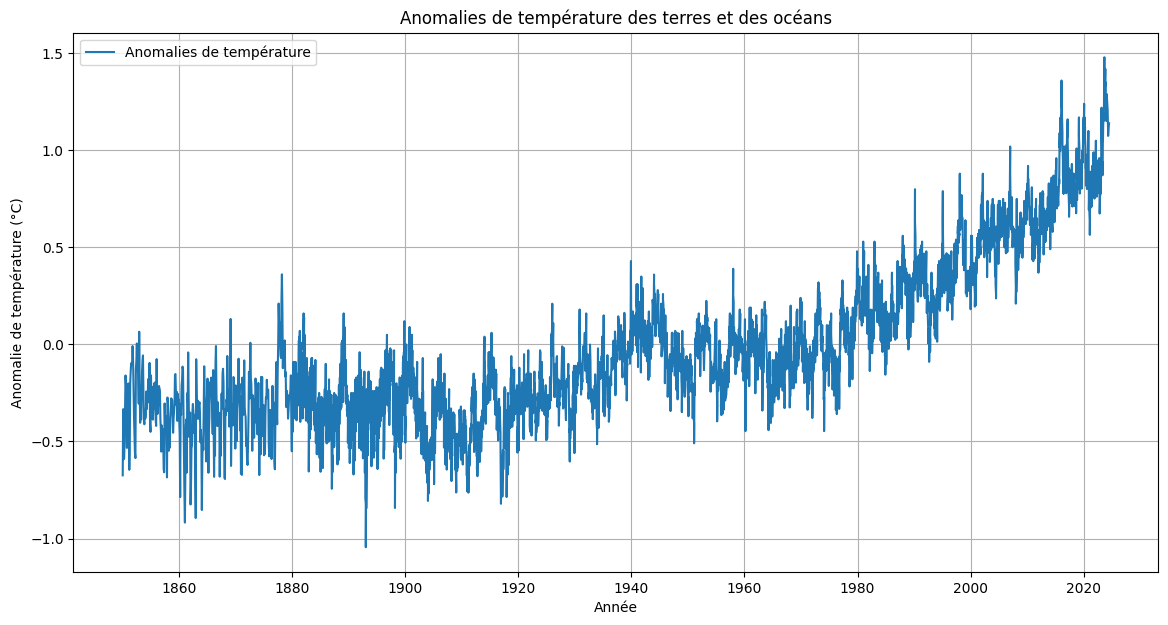

In [ ]:
# Visualisation de l'évolution des anomalies de température au fil du temps
plt.figure(figsize=(14,7))
plt.plot(data['Year'], data['Mean'], label='Anomalies de température')
plt.title('Anomalies de température des terres et des océans')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()


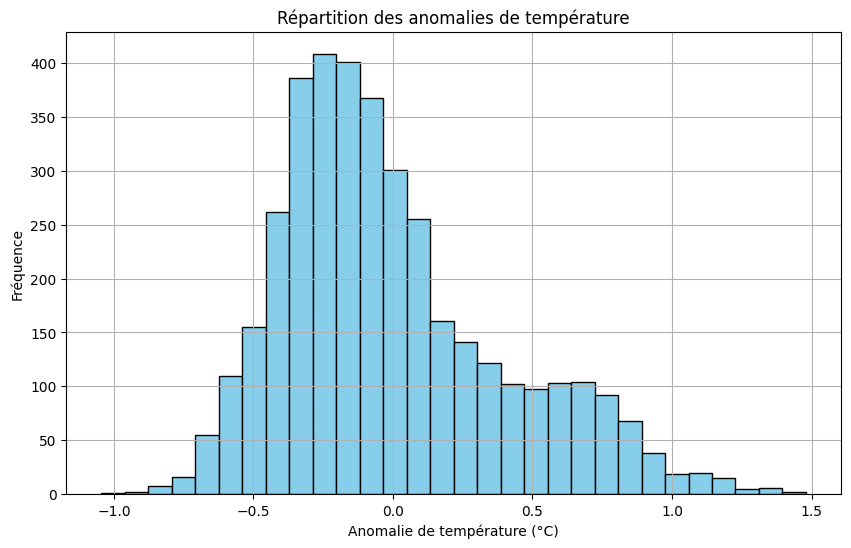

In [ ]:
# Histogramme de la répartition des anomalies de température
plt.figure(figsize=(10,6))
plt.hist(data['Mean'], bins=30, color='skyblue', edgecolor='black')
plt.title('Répartition des anomalies de température')
plt.xlabel('Anomalie de température (°C)')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


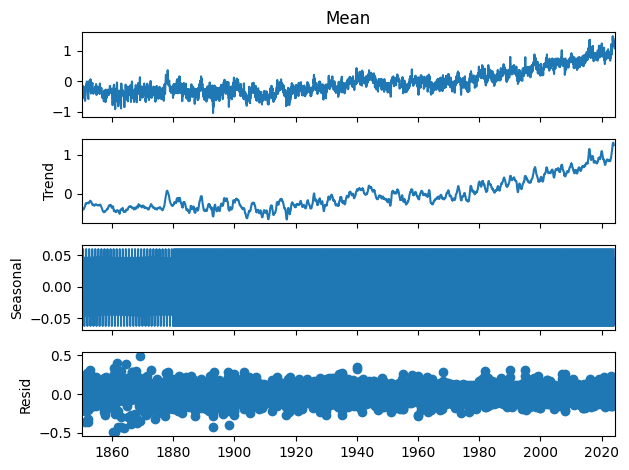

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Conversion de la colonne 'Year' en index pour la décomposition
data.index = pd.to_datetime(data['Year'])

# Décomposition de la série temporelle (additive)
decomposition = seasonal_decompose(data['Mean'], model='additive', period=12)
decomposition.plot()
plt.show()


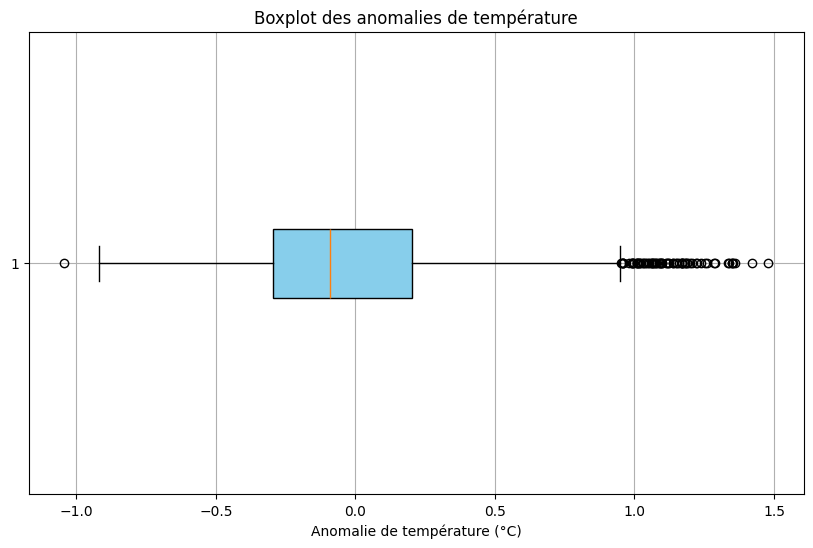

In [ ]:
# Boxplot pour détecter les outliers dans les anomalies de température
plt.figure(figsize=(10,6))
plt.boxplot(data['Mean'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot des anomalies de température')
plt.xlabel('Anomalie de température (°C)')
plt.grid(True)
plt.show()


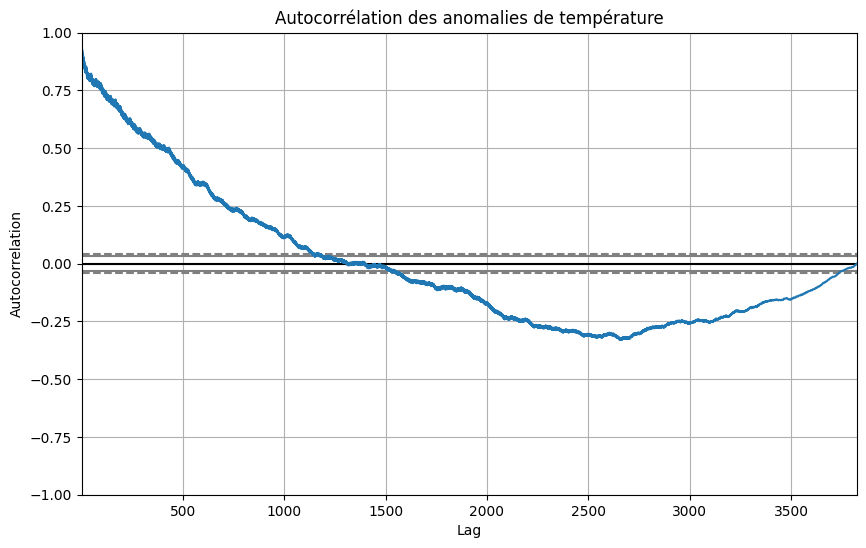

In [ ]:
from pandas.plotting import autocorrelation_plot

# x
plt.figure(figsize=(10,6))
autocorrelation_plot(data['Mean'])
plt.title('Autocorrélation des anomalies de température')
plt.show()

#L'autocorrélation dans une série temporelle mesure la corrélation des valeurs de la série avec ses
#propres valeurs à différents décalages temporels (lags). Cela permet de déterminer dans quelle mesure
#les valeurs futures peuvent être prédictibles en fonction des valeurs passées.


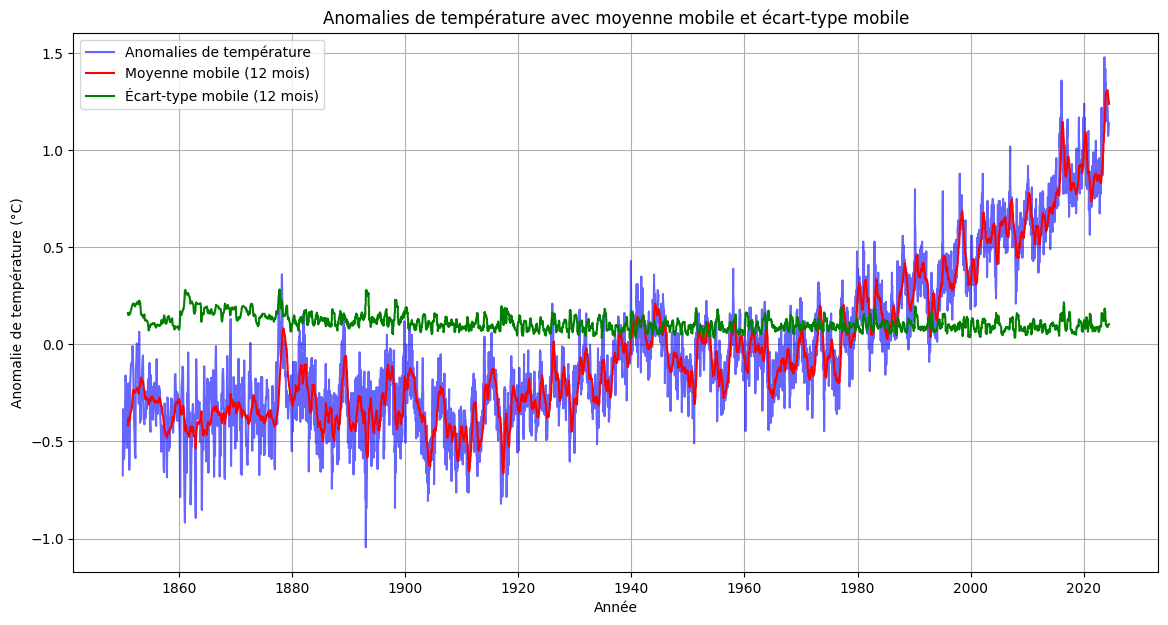

In [ ]:
# Calcul de la moyenne mobile sur 12 mois
rolling_mean = data['Mean'].rolling(window=12).mean()
rolling_std = data['Mean'].rolling(window=12).std()

# Tracé de la moyenne mobile et de l'écart-type mobile
plt.figure(figsize=(14,7))
plt.plot(data['Year'], data['Mean'], label='Anomalies de température', color='blue', alpha=0.6)
plt.plot(data['Year'], rolling_mean, label='Moyenne mobile (12 mois)', color='red')
plt.plot(data['Year'], rolling_std, label='Écart-type mobile (12 mois)', color='green')
plt.title('Anomalies de température avec moyenne mobile et écart-type mobile')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()


# 4. Découpage du jeu de données

La première étape lors de la création d'un modèle consiste à diviser les données en deux groupes, généralement appelés ensembles d'apprentissage et de test. L'ensemble d'apprentissage est utilisé par l'algorithme d'apprentissage automatique pour créer le modèle. L'ensemble de test contient des échantillons qui ne font pas partie du processus d'apprentissage et est utilisé pour évaluer les performances du modèle. Il est important d'évaluer la qualité du modèle à l'aide de données inédites pour garantir une évaluation objective.

In [ ]:
# Normalisation des données pour les faire entrer dans l'intervalle [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Mean'].values.reshape(-1, 1))

In [ ]:
# Création de séquences de données pour LSTM (par exemple, 12 mois de données pour prédire le mois suivant)
sequence_length = 12
X, y = [], []

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

In [ ]:
# Reshape des données pour le modèle LSTM (nombre d'échantillons, séquence, caractéristiques)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


Séparation des données en ensemble d'entraînement et de test

In [ ]:
# Séparation des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# 5. Comparaison des algorithmes

Création du modèle RNN classique

In [ ]:
# Création du modèle RNN classique
model = Sequential()

# Ajout de la première couche RNN
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))

# Ajout de la couche de sortie
model.add(Dense(units=1))

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
epochs = 50  # Nombre d'itérations
batch_size = 32  # Taille du lot d'apprentissage
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0477 - val_loss: 0.0093
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0022 - val_loss: 0.0073
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0065
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_l

In [ ]:
# Prédiction sur les données de test
predicted_temperature = model.predict(X_test)

# Inverser la normalisation pour comparer les valeurs prédites avec les vraies valeurs
predicted_temperature = scaler.inverse_transform(predicted_temperature)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


# Mean Squared Error (MSE)
mse = mean_squared_error(y_test_rescaled, predicted_temperature)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_rescaled, predicted_temperature)
print(f"Erreur absolue moyenne (MAE) : {mae}")

r2 = r2_score(y_test_rescaled, predicted_temperature)
print(f'R-squared (R²) : {r2}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Erreur quadratique moyenne (MSE) : 0.016273222485450822
Erreur quadratique moyenne (RMSE) : 0.12756654140271587
Erreur absolue moyenne (MAE) : 0.10020613513430374
R-squared (R²) : 0.7639992287148034


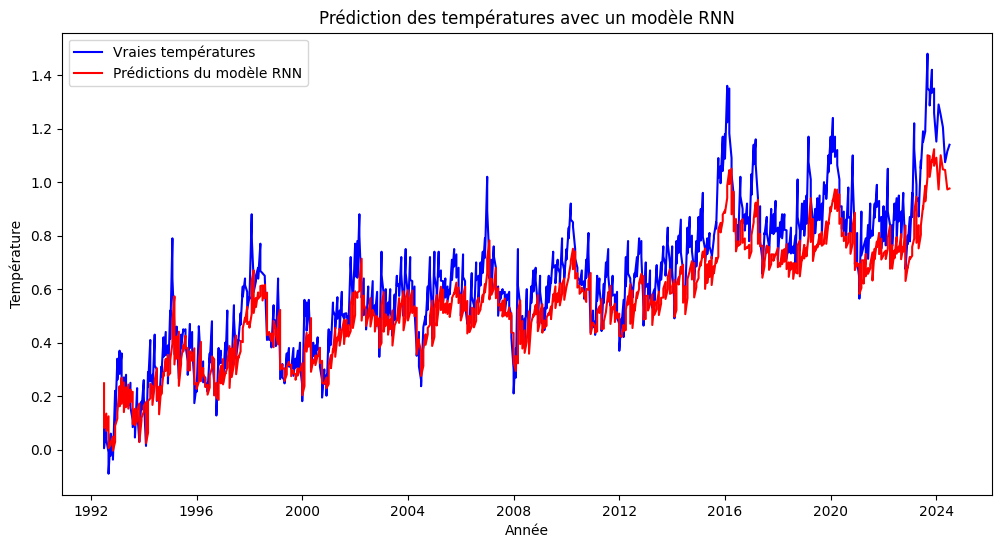

In [ ]:
dates = data['Year'].values[sequence_length:]
train_dates, test_dates = train_test_split(dates, test_size=0.2, shuffle=False)

# Visualisation avec des années/dates sur l'axe X
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_rescaled, color='blue', label='Vraies températures')
plt.plot(test_dates, predicted_temperature, color='red', label='Prédictions du modèle RNN')
plt.title("Prédiction des températures avec un modèle RNN")
plt.xlabel("Année")
plt.ylabel("Température")
plt.legend()
plt.show()

In [ ]:
# Validation croisée pour réduire le biais et améliorer aussi la performance

# Stocker les scores pour chaque métrique
rmse_scores = []
mse_scores = []
mae_scores = []
r2_scores = []

tscv = TimeSeriesSplit(n_splits=5)
for split_index, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Créez et entraînez le modèle RNN pour chaque split
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(SimpleRNN(units=50))
    model.add(Dense(1))
    model.compile(optimizer= 'adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Évaluez le modèle pour chaque split et enregistrez les erreurs
    val_predictions = model.predict(X_val)
    # Inversez la normalisation pour une interprétation correcte des erreurs
    val_predictions_rescaled = scaler.inverse_transform(val_predictions)
    y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculer les erreurs pour chaque split
    val_rmse = np.sqrt(mean_squared_error(y_val_rescaled, val_predictions_rescaled))
    val_mse = mean_squared_error(y_val_rescaled, val_predictions_rescaled)
    val_mae = mean_absolute_error(y_val_rescaled, val_predictions_rescaled)
    val_r2 = r2_score(y_val_rescaled, val_predictions_rescaled)

    # Afficher les résultats pour chaque split
    print(f"Split {split_index + 1}:")
    print(f"  RMSE: {val_rmse}")
    print(f"  MSE: {val_mse}")
    print(f"  MAE: {val_mae}")
    print(f"  R²: {val_r2}")

    # Stocker les scores dans les listes correspondantes
    rmse_scores.append(val_rmse)
    mse_scores.append(val_mse)
    mae_scores.append(val_mae)
    r2_scores.append(val_r2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Split 1:
  RMSE: 0.11647328401395418
  MSE: 0.013566025888995234
  MAE: 0.09028297618943171
  R²: 0.5816633602510435


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Split 2:
  RMSE: 0.1047395641102161
  MSE: 0.010970376289998066
  MAE: 0.08007914004602579
  R²: 0.6723291738973423


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Split 3:
  RMSE: 0.09324336395279328
  MSE: 0.008694324921233069
  MAE: 0.07041071152081944
  R²: 0.5295277060470103


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Split 4:
  RMSE: 0.0958640957598953
  MSE: 0.009189924855862376
  MAE: 0.07039701109704445
  R²: 0.7587235060204037


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Split 5:
  RMSE: 0.12089474976583875
  MSE: 0.01461554052094477
  MAE: 0.09571778414072954
  R²: 0.7122824185942304


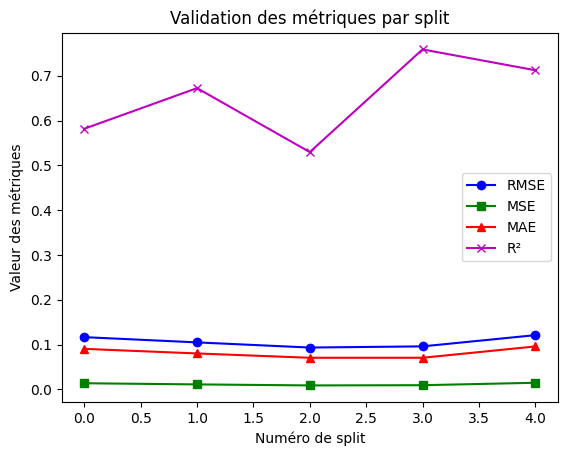

In [ ]:
plt.plot(rmse_scores, marker='o', color='b', label='RMSE')
plt.plot(mse_scores, marker='s', color='g', label='MSE')
plt.plot(mae_scores, marker='^', color='r', label='MAE')
plt.plot(r2_scores, marker='x', color='m', label='R²')

# Titre et labels
plt.title('Validation des métriques par split')
plt.xlabel('Numéro de split')
plt.ylabel('Valeur des métriques')

# Affichage de la légende pour identifier chaque métrique
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
# Affichage des scores pour chaque split et calcul de la moyenne pour chaque métrique
# RMSE
print("RMSE par split:", rmse_scores)
mean_rmse = np.mean(rmse_scores)
print(f"Moyenne RMSE : {mean_rmse}")

# MSE
print("MSE par split:", mse_scores)
mean_mse = np.mean(mse_scores)
print(f"Moyenne MSE : {mean_mse}")

# MAE
print("MAE par split:", mae_scores)
mean_mae = np.mean(mae_scores)
print(f"Moyenne MAE : {mean_mae}")

# R²
print("R² par split:", r2_scores)
mean_r2 = np.mean(r2_scores)
print(f"Moyenne R² : {mean_r2}")

RMSE par split: [0.11647328401395418, 0.1047395641102161, 0.09324336395279328, 0.0958640957598953, 0.12089474976583875]
Moyenne RMSE : 0.10624301152053953
MSE par split: [0.013566025888995234, 0.010970376289998066, 0.008694324921233069, 0.009189924855862376, 0.01461554052094477]
Moyenne MSE : 0.011407238495406704
MAE par split: [0.09028297618943171, 0.08007914004602579, 0.07041071152081944, 0.07039701109704445, 0.09571778414072954]
Moyenne MAE : 0.08137752459881017
R² par split: [0.5816633602510435, 0.6723291738973423, 0.5295277060470103, 0.7587235060204037, 0.7122824185942304]
Moyenne R² : 0.6509052329620061


Création du modèle LSTM

In [ ]:
# Création du modèle LSTM
model = Sequential()

In [ ]:
# Ajout de la couche LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Ajout de la couche de sortie
model.add(Dense(units=1))

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0208 - val_loss: 0.0059
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

Évaluation et visualisation des résultats

In [ ]:
# Prédiction des données de test
y_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# Inverser la normalisation pour revenir aux vraies valeurs de température
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

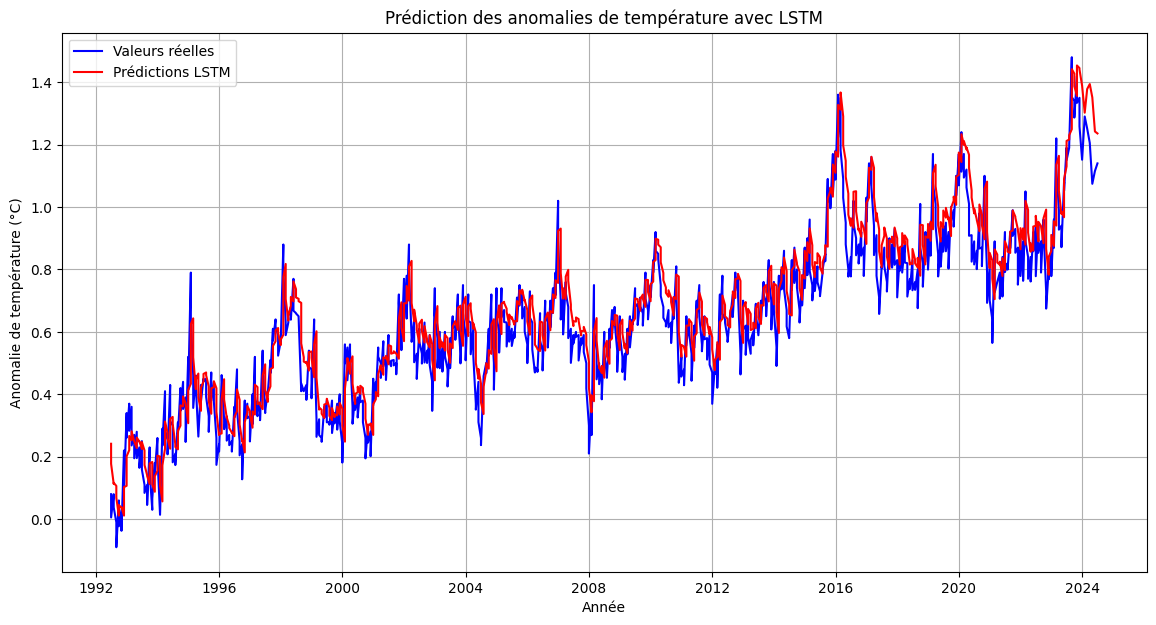

In [ ]:
# Visualisation des résultats
plt.figure(figsize=(14,7))
plt.plot(data['Year'].values[-len(y_test):], y_test_inv, color='blue', label='Valeurs réelles')
plt.plot(data['Year'].values[-len(y_test):], y_pred_inv, color='red', label='Prédictions LSTM')
plt.title('Prédiction des anomalies de température avec LSTM')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()


Évaluation du modèle

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Erreur quadratique moyenne (MSE) : {mse}')


Erreur quadratique moyenne (MSE) : 0.012002661159883014


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcul de la racine de l'erreur quadratique moyenne
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE) : {rmse}')


Root Mean Squared Error (RMSE) : 0.10955665730517253


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcul de l'erreur absolue moyenne
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error (MAE) : {mae}')


Mean Absolute Error (MAE) : 0.08993002681678082


In [ ]:
from sklearn.metrics import r2_score

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared (R²) : {r2}')


R-squared (R²) : 0.8259326145304164


In [ ]:
# Liste pour stocker les scores pour chaque metrique
rmse_scores = []
mse_scores = []
mae_scores = []
r2_scores = []


# Définir TimeSeriesSplit pour la validation croisée
tscv = TimeSeriesSplit(n_splits=5)

# Validation croisée
for split_index, (train_index, test_index) in enumerate(tscv.split(X)):
    # Diviser les données en ensemble d'entraînement et de validation
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Créer et entraîner le modèle LSTM pour chaque split
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entraîner le modèle
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Prédire les valeurs de validation
    val_predictions = model.predict(X_val)

    # Inverser la normalisation si nécessaire
    val_predictions_rescaled = scaler.inverse_transform(val_predictions)
    y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculer les erreurs pour chaque split
    val_rmse = np.sqrt(mean_squared_error(y_val_rescaled, val_predictions_rescaled))
    val_mse = mean_squared_error(y_val_rescaled, val_predictions_rescaled)
    val_mae = mean_absolute_error(y_val_rescaled, val_predictions_rescaled)
    val_r2 = r2_score(y_val_rescaled, val_predictions_rescaled)

    # Afficher les résultats pour chaque split
    print(f"Split {split_index + 1}:")
    print(f"  RMSE: {val_rmse}")
    print(f"  MSE: {val_mse}")
    print(f"  MAE: {val_mae}")
    print(f"  R²: {val_r2}")

    # Stocker les scores dans les listes correspondantes
    rmse_scores.append(val_rmse)
    mse_scores.append(val_mse)
    mae_scores.append(val_mae)
    r2_scores.append(val_r2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Split 1:
  RMSE: 0.13319078347100677
  MSE: 0.01773978480162061
  MAE: 0.1053750117749492
  R²: 0.45295681841506297


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Split 2:
  RMSE: 0.10141486301979574
  MSE: 0.010284974441323935
  MAE: 0.07562915690916114
  R²: 0.6928012328341082


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Split 3:
  RMSE: 0.10146465859834579
  MSE: 0.010295076944478865
  MAE: 0.0764108773311207
  R²: 0.4429068949720626


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Split 4:
  RMSE: 0.10483099715779647
  MSE: 0.01098953796509793
  MAE: 0.08107075435664886
  R²: 0.711475639653021


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Split 5:
  RMSE: 0.12058178530557868
  MSE: 0.014539966947480672
  MAE: 0.08851691834697574
  R²: 0.7137701395405834


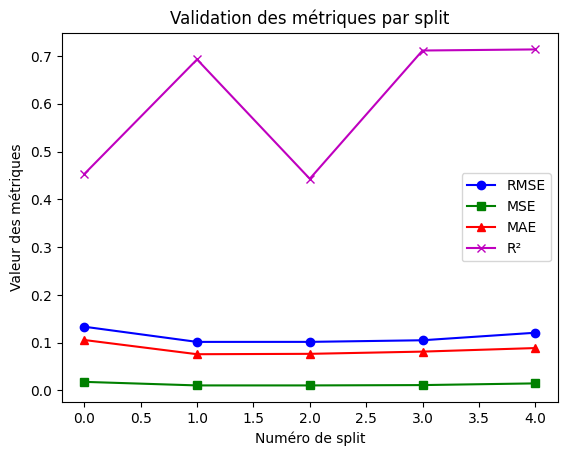

In [ ]:
# Création du graphique avec toutes les métriques
plt.plot(rmse_scores, marker='o', color='b', label='RMSE')
plt.plot(mse_scores, marker='s', color='g', label='MSE')
plt.plot(mae_scores, marker='^', color='r', label='MAE')
plt.plot(r2_scores, marker='x', color='m', label='R²')

# Titre et labels
plt.title('Validation des métriques par split')
plt.xlabel('Numéro de split')
plt.ylabel('Valeur des métriques')

# Affichage de la légende pour identifier chaque métrique
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
# Affichage des scores pour chaque split et calcul de la moyenne pour chaque métrique
# RMSE
print("RMSE par split:", rmse_scores)
mean_rmse = np.mean(rmse_scores)
print(f"Moyenne RMSE : {mean_rmse}")

# MSE
print("MSE par split:", mse_scores)
mean_mse = np.mean(mse_scores)
print(f"Moyenne MSE : {mean_mse}")

# MAE
print("MAE par split:", mae_scores)
mean_mae = np.mean(mae_scores)
print(f"Moyenne MAE : {mean_mae}")

# R²
print("R² par split:", r2_scores)
mean_r2 = np.mean(r2_scores)
print(f"Moyenne R² : {mean_r2}")

RMSE par split: [0.13319078347100677, 0.10141486301979574, 0.10146465859834579, 0.10483099715779647, 0.12058178530557868]
Moyenne RMSE : 0.11229661751050471
MSE par split: [0.01773978480162061, 0.010284974441323935, 0.010295076944478865, 0.01098953796509793, 0.014539966947480672]
Moyenne MSE : 0.012769868220000402
MAE par split: [0.1053750117749492, 0.07562915690916114, 0.0764108773311207, 0.08107075435664886, 0.08851691834697574]
Moyenne MAE : 0.08540054374377112
R² par split: [0.45295681841506297, 0.6928012328341082, 0.4429068949720626, 0.711475639653021, 0.7137701395405834]
Moyenne R² : 0.6027821450829676


GRU

In [ ]:
# Création du modèle GRU
model = Sequential()

In [ ]:
# Ajout de la première couche GRU
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=50, return_sequences=False))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Ajout de la couche de sortie
model.add(Dense(units=1))

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0262 - val_loss: 0.0074
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Evaluation et Visualisation des résultats





In [ ]:
# Prédiction des données de test
y_pred = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
# Inverser la normalisation pour revenir aux vraies valeurs
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

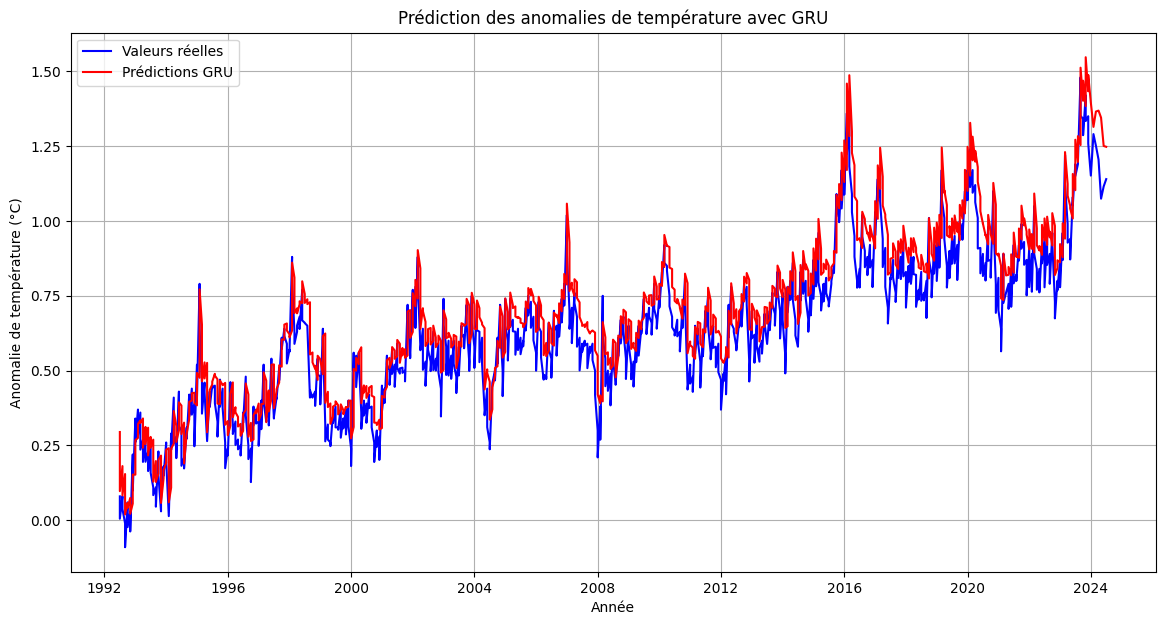

In [ ]:
# Visualisation des résultats
plt.figure(figsize=(14,7))
plt.plot(data['Year'].values[-len(y_test):], y_test_inv, color='blue', label='Valeurs réelles')
plt.plot(data['Year'].values[-len(y_test):], y_pred_inv, color='red', label='Prédictions GRU')
plt.title('Prédiction des anomalies de température avec GRU')
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.legend()
plt.grid(True)
plt.show()

Evaluation du modèle

In [ ]:
# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Erreur quadratique moyenne (MSE) : {mse}')

Erreur quadratique moyenne (MSE) : 0.013880482403744954


In [ ]:
# Calcul de la racine de l'erreur quadratique moyenne
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE) : {rmse}')

Root Mean Squared Error (RMSE) : 0.11781545910340015


In [ ]:
# Calcul de l'erreur absolue moyenne
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'Mean Absolute Error (MAE) : {mae}')

Mean Absolute Error (MAE) : 0.10067357425250281


In [ ]:
# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared (R²) : {r2}')

R-squared (R²) : 0.7986997009336557


In [ ]:
# Liste pour stocker les scores pour chaque metrique
rmse_scores = []
mse_scores = []
mae_scores = []
r2_scores = []

In [ ]:
# Initialisez la validation croisée temporelle
tscv = TimeSeriesSplit(n_splits=5)
for split_index, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    # Création et entraînement du modèle GRU pour chaque split
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Évaluation du modèle pour chaque split et enregistrement des erreurs
    val_predictions = model.predict(X_val)
    # Inversez la normalisation pour interpréter correctement les erreurs
    val_predictions_rescaled = scaler.inverse_transform(val_predictions)
    y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1))

    # Calculer les erreurs pour chaque split
    val_rmse = np.sqrt(mean_squared_error(y_val_rescaled, val_predictions_rescaled))
    val_mse = mean_squared_error(y_val_rescaled, val_predictions_rescaled)
    val_mae = mean_absolute_error(y_val_rescaled, val_predictions_rescaled)
    val_r2 = r2_score(y_val_rescaled, val_predictions_rescaled)

    # Afficher les résultats pour chaque split
    print(f"Split {split_index + 1}:")
    print(f"  RMSE: {val_rmse}")
    print(f"  MSE: {val_mse}")
    print(f"  MAE: {val_mae}")
    print(f"  R²: {val_r2}")

    # Stocker les scores dans les listes correspondantes
    rmse_scores.append(val_rmse)
    mse_scores.append(val_mse)
    mae_scores.append(val_mae)
    r2_scores.append(val_r2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Split 1:
  RMSE: 0.12948125148881656
  MSE: 0.01676539448711016
  MAE: 0.10285154865336231
  R²: 0.48300417150959707


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Split 2:
  RMSE: 0.1128072995627662
  MSE: 0.01272548683464367
  MAE: 0.08792278128288172
  R²: 0.6199063119222392


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Split 3:
  RMSE: 0.09370472885274543
  MSE: 0.008780576209366541
  MAE: 0.07246649087037672
  R²: 0.5248604269020298


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Split 4:
  RMSE: 0.12791509202006332
  MSE: 0.016362270766501263
  MAE: 0.10322752489339779
  R²: 0.5704174532430597


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Split 5:
  RMSE: 0.1011970518568674
  MSE: 0.01024084330452151
  MAE: 0.0771998073178389
  R²: 0.7984015259025169


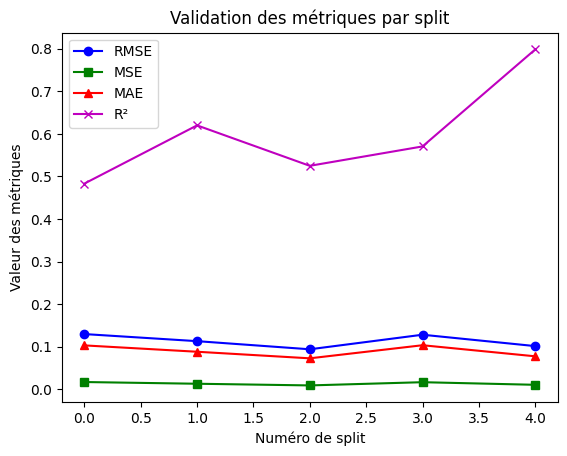

In [ ]:
# Création du graphique avec toutes les métriques
plt.plot(rmse_scores, marker='o', color='b', label='RMSE')
plt.plot(mse_scores, marker='s', color='g', label='MSE')
plt.plot(mae_scores, marker='^', color='r', label='MAE')
plt.plot(r2_scores, marker='x', color='m', label='R²')

# Titre et labels
plt.title('Validation des métriques par split')
plt.xlabel('Numéro de split')
plt.ylabel('Valeur des métriques')

# Affichage de la légende pour identifier chaque métrique
plt.legend()

# Affichage du graphique
plt.show()

In [ ]:
# Affichage des scores pour chaque split et calcul de la moyenne pour chaque métrique
# RMSE
print("RMSE par split:", rmse_scores)
mean_rmse = np.mean(rmse_scores)
print(f"Moyenne RMSE : {mean_rmse}")

# MSE
print("MSE par split:", mse_scores)
mean_mse = np.mean(mse_scores)
print(f"Moyenne MSE : {mean_mse}")

# MAE
print("MAE par split:", mae_scores)
mean_mae = np.mean(mae_scores)
print(f"Moyenne MAE : {mean_mae}")

# R²
print("R² par split:", r2_scores)
mean_r2 = np.mean(r2_scores)
print(f"Moyenne R² : {mean_r2}")

RMSE par split: [0.12948125148881656, 0.1128072995627662, 0.09370472885274543, 0.12791509202006332, 0.1011970518568674]
Moyenne RMSE : 0.11302108475625179
MSE par split: [0.01676539448711016, 0.01272548683464367, 0.008780576209366541, 0.016362270766501263, 0.01024084330452151]
Moyenne MSE : 0.012974914320428629
MAE par split: [0.10285154865336231, 0.08792278128288172, 0.07246649087037672, 0.10322752489339779, 0.0771998073178389]
Moyenne MAE : 0.08873363060357149
R² par split: [0.48300417150959707, 0.6199063119222392, 0.5248604269020298, 0.5704174532430597, 0.7984015259025169]
Moyenne R² : 0.5993179778958886


Tableau comparatif

In [ ]:
# Données des performances sans validation croisée
data_sans_validation = {
    'Métriques': ['MSE', 'RMSE', 'MAE', 'R²'],
    'RNN': [0.02194778825642869, 0.14814785943923958, 0.12204723476434459, 0.7639992287148034],
    'LSTM': [0.01159796896547507, 0.10769386688885801, 0.07957462767796594, 0.8259326145304164],
    'GRU': [0.01005443228639817, 0.10027179207732437, 0.07747213276727893, 0.7986997009336557]
}

# Données des performances avec validation croisée
data_avec_validation = {
    'Métriques': ['MSE', 'RMSE', 'MAE', 'R²'],
    'RNN': [0.011407238495406704, 0.10624301152053953, 0.08137752459881017, 0.6509052329620061],
    'LSTM': [0.012769868220000402, 0.11229661751050471, 0.08540054374377112, 0.6027821450829676],
    'GRU': [0.012974914320428629, 0.11302108475625179,  0.08873363060357149, 0.5993179778958886]
}

# Création des DataFrames
df_sans_validation = pd.DataFrame(data_sans_validation)
df_avec_validation = pd.DataFrame(data_avec_validation)

# Renommer les colonnes pour la présentation
df_sans_validation.columns = ['Métriques', 'RNN (Sans Validation Croisée)', 'LSTM (Sans Validation Croisée)', 'GRU (Sans Validation Croisée)']
df_avec_validation.columns = ['Métriques', 'RNN (Avec Validation Croisée)', 'LSTM (Avec Validation Croisée)', 'GRU (Avec Validation Croisée)']

# Fusionner les deux DataFrames pour avoir un tableau final
df_comparaison = pd.merge(df_sans_validation, df_avec_validation, on='Métriques')

# Affichage du tableau comparatif
df_comparaison


,Métriques,RNN (Sans Validation Croisée),LSTM (Sans Validation Croisée),GRU (Sans Validation Croisée),RNN (Avec Validation Croisée),LSTM (Avec Validation Croisée),GRU (Avec Validation Croisée)
0,MSE,0.021948,0.011598,0.010054,0.011407,0.012770,0.012975
1,RMSE,0.148148,0.107694,0.100272,0.106243,0.112297,0.113021
2,MAE,0.122047,0.079575,0.077472,0.081378,0.085401,0.088734
3,R²,0.763999,0.825933,0.798700,0.650905,0.602782,0.599318


# Analyse des Résultats

En examinant le tableau comparatif des performances des modèles RNN, LSTM et GRU avec et sans validation croisée, nous avons les observations suivantes :

## Interprétation des Métriques

* MSE (Erreur Quadratique Moyenne) : Représente la moyenne des carrés des erreurs, où une valeur plus faible indique une meilleure performance du modèle. Les valeurs MSE sont beaucoup plus faibles pour les modèles RNN et GRU sans validation croisée, ce qui indique une meilleure précision sur ces ensembles de données.

* RMSE (Racine de l'Erreur Quadratique Moyenne) : Semblable au MSE, mais exprimée dans la même unité que la variable cible, facilitant l'interprétation. Encore une fois, le GRU montre la meilleure performance sans validation croisée.

* MAE (Erreur Absolue Moyenne) : Mesure la moyenne des erreurs absolues, indiquant la précision du modèle. Le GRU obtient les meilleures valeurs pour cette métrique, ce qui signifie qu'il prédit plus fidèlement les valeurs cibles.

* R² (Coefficient de Détermination) : Mesure la proportion de la variance des données expliquée par le modèle. Une valeur R² plus élevée indique que le modèle explique mieux les variations des données. Le LSTM a la meilleure performance sans validation croisée.

## Discussion sur les Modèles

* RNN : Bien qu'il ait des performances compétitives, il montre des valeurs plus élevées pour les erreurs (MSE, RMSE, MAE) et un R² plus faible en validation croisée, ce qui pourrait indiquer un surajustement aux données d'entraînement.

* LSTM : Bien qu'il ait montré de bonnes performances sans validation croisée, il a tendance à surajuster lors de la validation croisée, comme le montre la baisse de R².

* GRU : Montre des résultats solides à la fois sans validation croisée et avec validation croisée. Il semble offrir un bon équilibre entre complexité et capacité de généralisation.

# 6. Optimisation de l'algorithme fianl choisi

Après la comparaison des trois (3) algorithmes, en tenant compte des différents metriques, nous avons choisi GRU comme le meilleur algorithme. Nous allons maintenant optimiser cet algorithme pour entrainer notre model final et le deployer.

Nous allons choisir quelques hyperparamètres à optimiser.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input
from scikeras.wrappers import KerasRegressor

# Fonction pour créer un modèle GRU
def create_gru_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Ajouter une couche Input
    model.add(GRU(units=units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Cible pour la régression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Envelopper le modèle Keras dans KerasRegressor
model = KerasRegressor(
    model=create_gru_model,
    verbose=0,
    units=50,
    dropout_rate=0.2

# Paramètres à optimiser
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.1, 0.2],
    'batch_size': [16, 32],
}

# RandomizedSearchCV pour optimiser le modèle GRU
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,  # Limite les essais à 5 combinaisons aléatoires
    scoring='neg_mean_squared_error',
    cv=5
)
random_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model_gru = random_search.best_estimator_
print(f"Meilleurs hyperparamètres : {random_search.best_params_}")


Meilleurs hyperparamètres : {'units': 100, 'dropout_rate': 0.1, 'batch_size': 16}


In [ ]:
best_params = {'units': 100, 'dropout_rate': 0.1, 'batch_size': 16}

# Crée un nouveau modèle avec les meilleurs paramètres
final_model = Sequential()
final_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
final_model.add(GRU(units=best_params['units'], return_sequences=True))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(GRU(units=best_params['units']))
final_model.add(Dropout(best_params['dropout_rate']))
final_model.add(Dense(1))
final_model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner avec le batch_size optimisé
history = final_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=100, validation_split=0.1)


Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0121 - val_loss: 0.0022
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 10/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 11/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 12/100
172/172 ━━━━━━━━━━━━━━━━━━━

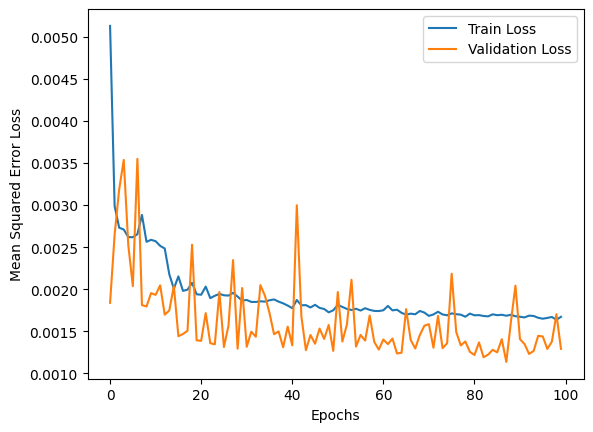

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


In [ ]:
# les différents scores pour le model final
y_pred = final_model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erreur absolue moyenne (MAE) : {mae}")

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) : {r2}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Erreur quadratique moyenne (MSE) : 0.006013251733159007
Erreur quadratique moyenne (RMSE) : 0.07754515931480835
Erreur absolue moyenne (MAE) : 0.05939065403145261
R-squared (R²) : 0.44404759920906145


In [ ]:
# Simuler des données d'entrée (par exemple, les 12 derniers mois de températures)
input_data = np.array([-0.6746, -0.3334, -0.5913, -0.5887, -0.5088, -0.3500,
                        -0.4000, -0.3000, -0.4500, -0.6000, -0.5500, -0.7000])

# Normaliser les données d'entrée
scaler = MinMaxScaler(feature_range=(0, 1))
input_data_scaled = scaler.fit_transform(input_data.reshape(-1, 1))

# Créer la séquence pour la prédiction
sequence_length = 12
X_input = input_data_scaled.reshape(1, sequence_length, 1)  # Reshape pour le modèle

# Faire la prédiction
predicted_temperature_scaled = final_model.predict(X_input)

# Inverser la normalisation pour obtenir la température prédites
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)

print(f"Température prédite : {predicted_temperature[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Température prédite : -0.6787397265434265


In [ ]:
import pickle
# Enregistrer le model pour une utilisation ultérieure ou pour un deployement
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)

# Enregistrez le scaler pour une normalisation cohérente lors de l'inférence
with open('sample_data/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
final_model.save('sample_data/temperature_prediction_model.h5')

In [ ]:
import pickle
from keras.models import load_model
import numpy as np

# Charger le modèle et le scaler
final_model = load_model('sample_data/temperature_prediction_model.h5')
with open('sample_data/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Exemple de prédiction
input_data = np.array([-0.6746, -0.3334, -0.5913, -0.5887, -0.5088, -0.3500,
                       -0.4000, -0.3000, -0.4500, -0.6000, -0.5500, -0.7000])

# Normaliser les données d'entrée avec le scaler chargé
input_data_scaled = scaler.transform(input_data.reshape(-1, 1)).reshape(1, -1, 1)

# Faire la prédiction
predicted_temperature_scaled = final_model.predict(input_data_scaled)

# Inverser la normalisation pour obtenir la température prédite
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)
print(f"Température prédite : {predicted_temperature[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Température prédite : 0.3155911862850189


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pickle

# Charger le modèle sauvegardé
model_path = 'sample_data/temperature_prediction_model.h5'  # Modifier avec le chemin réel du modèle
final_model = tf.keras.models.load_model(model_path)

# Charger le scaler sauvegardé avec pickle
with open('sample_data/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Définir les données d'entrée
input_data = np.array([-0.6746, -0.3334, -0.5913, -0.5887, -0.5088, -0.3500,
                       -0.4000, -0.3000, -0.4500, -0.6000, -0.5500, -0.7000])

# Normaliser les données d'entrée avec fit_transform()
input_data_scaled = scaler.fit_transform(input_data.reshape(-1, 1))

# Créer la séquence pour la prédiction
sequence_length = 12
X_input = input_data_scaled.reshape(1, sequence_length, 1)  # Reshape pour le modèle

# Faire la prédiction
predicted_temperature_scaled = final_model.predict(X_input)

# Inverser la normalisation pour obtenir la température prédite
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)

print(f"Température prédite : {predicted_temperature[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Température prédite : -0.6787396669387817
